# 生成音楽の **valence** , **arousal** を出力

### MIDI→audio (* **MIDI音楽 → wav方式音楽**)

https://pypi.org/project/midi2audio/

In [1]:
! fluidsynth --version | grep libsndfile   

FluidSynth runtime version 2.3.6
Copyright (C) 2000-2024 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.

FluidSynth executable version 2.3.6
Sample type=double


In [6]:
from midi2audio import FluidSynth

fs = FluidSynth()
# fs = FluidSynth('sound_font.sf2') # ← サウンドフォントの変更
# fs.play_midi('.mid')
fs.midi_to_audio('./evaluate_music/3_LA.mid', './evaluate_music/3_LA.wav')

fluidsynth: panic: An error occurred while reading from stdin.
fluidsynth: panic: An error occurred while reading from stdin.


FluidSynth runtime version 2.3.6
Copyright (C) 2000-2024 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.



fluidsynth: panic: An error occurred while reading from stdin.
fluidsynth: panic: An error occurred while reading from stdin.


FluidSynth runtime version 2.3.6
Copyright (C) 2000-2024 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.

Rendering audio to file './evaluate_music/3_LA.wav'..


In [ ]:
import os
import glob

# ファイルまとめて処理
file_path = glob.glob('.mid')    # '../midis/*.mid'
for j, file in enumerate(file_path):
    print(file) 
    fs.midi_to_audio(file , '/Users/kawabemoyu/Desktop/研究/generation-music-emo2025/generation_output_emo_0613_4/'+ os.path.splitext(os.path.basename(file))[0] + '.wav') # '../audio/'

## 座標

### **valence** , **arousal** を出力
MTG API：(https://replicate.com/mtg/music-arousal-valence/api)

<APIトークン>  
r8_VEl1BgMqBUKAovvctvLQvEXgEgB2iHs257APa

In [4]:
import replicate
import torch
import os

#REPLICATE_API_TOKEN = getpass()
os.environ["REPLICATE_API_TOKEN"] = ""

In [5]:
import base64
audio = open(".wav" , "rb")

In [ ]:
input = {
    "url": "https://www.youtube.com/watch?v=_8v0MFBZoco", 
    "output_format": "Visualization",
    "embedding_type": "msd-musicnn",
    "audio": audio, #'./evaluate_music/3_LA.wav'
    "dataset": "emomusic" , 
    "embedding_type": "msd-musicnn"
}


output = replicate.run(
    "mtg/music-arousal-valence:1064850eeb2853ac69d7ff50c05404e7113ade77e176a6760086354e49c13dee",
    input=input
)

print(output)
# ReplicateError: ReplicateError Details:title: Billing required status: 402

### Essentia (MTGの大元)  
https://essentia.upf.edu/models.html  

* モデルの使用方法  
https://essentia.upf.edu/installing.html  
https://essentia.upf.edu/machine_learning.html  
https://gist.github.com/jarmitage/40e3b7962b0a77a233b2d590d69378d6  

In [ ]:
from essentia.standard import MonoLoader , TensorflowPredictMusiCNN, TensorflowPredict2D

brew install python --framework  
pip install ipython numpy matplotlib pyyaml  
↓  
* numpyが使えない  
pip pip install ipython numpy → error: externally-managed-environment
  
* Essentiaのコンパイル   
python3 waf configure --build-static --with-python --with-cpptests --with-examples --with-vamp

CUDAのバージョンに合わせて、**tensorflow**のインストール (https://pages.samuraishockdo.com/anaconda_tensorflow.html)

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2,3'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
import tensorflow as tf
print(tf.__version__)
#print('GPU is available: ', tf.test.is_gpu_available())
print('GPU is available: ', len(tf.config.list_physical_devices('GPU')))

2025-11-14 09:19:15.204698: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


2.3.0
GPU is available:  0


2025-11-14 09:19:16.402267: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2025-11-14 09:19:16.464604: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:0e:00.0 name: Tesla V100-DGXS-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.73GiB deviceMemoryBandwidth: 836.37GiB/s
2025-11-14 09:19:16.464882: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 1 with properties: 
pciBusID: 0000:0f:00.0 name: Tesla V100-DGXS-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.73GiB deviceMemoryBandwidth: 836.37GiB/s
2025-11-14 09:19:16.464905: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2025-11-14 09:19:16.466720: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.

Linuxなら、python==3.7で動く  
(https://essentia.upf.edu/tutorial_tensorflow_auto-tagging_classification_embeddings.html)

xy表の見方  
* 座標 (valence, arousal)  
* 範囲 [1,9]

In [4]:
# 座標値を-1~1表示
def average_xV_yA (predictions):
    xV = ((tf.reduce_mean(predictions[:,0]) - 5.0)/4.0).numpy() # valence
    yA = ((tf.reduce_mean(predictions[:,1]) - 5.0)/4.0).numpy() # arousal
    xV = str(xV.mean())
    yA = str(yA.mean())
    
    return xV ,yA

* 複数ファイルの場合  
(https://github.com/MTG/essentia-replicate-demos/blob/main/music-arousal-valence/predict.py#L157)

In [31]:
import numpy as np
from essentia.standard import MonoLoader, TensorflowPredictMusiCNN, TensorflowPredict2D, TensorflowPredictVGGish

audioQ4 = os.listdir('../EMOPIA_audio_split_4/')
xV = np.empty((len(audioQ4), 1))
yA = np.empty((len(audioQ4), 1))
#embedding_model = TensorflowPredictMusiCNN(graphFilename="./evaluate_music/audioset-vggish-3.pb", output="model/dense/BiasAdd") # msd-musicnn-1.pb
embedding_model = TensorflowPredictVGGish(graphFilename="./evaluate_music/audioset-vggish-3.pb", output="model/vggish/embeddings") # msd-musicnn-1.pb
model = TensorflowPredict2D(graphFilename="./evaluate_music/muse-audioset-vggish-2.pb", output="model/Identity")
    

* tensorflowにエラー?  
This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [32]:
for i , audio in enumerate(audioQ4):
    audio1 = MonoLoader(filename="../EMOPIA_audio_split_4/" + str(audio), sampleRate=16000, resampleQuality=4)()
    #audio1 = MonoLoader(filename="./evaluate_music/generation_output_emo_0613_1wav/1220_50_diff_midi_giant_midi_piano_REMI_bar_block_rand32_transformer_lr0.0001_0.0_4000_sqrt_Lsimple_h128_s2_d0.1_sd102_xstart_midi.model096000.pt.infill_control_attribute___"+str(i)+".wav", sampleRate=16000, resampleQuality=4)()
        
    embeddings1 = embedding_model(audio1)
    predictions1 = model(embeddings1)
    xV[i] , yA[i]  = average_xV_yA(predictions1)
    print(xV[i])
    print(yA[i])
    print(i)

# csvファイル書き込み
import csv
header = ['filename','valence' , 'arousal']
with open('EMOPIA_mp3_Q4_muse_vgg.csv', 'w', newline='') as f:
    writer = csv.writer(f)  
    #writer.writeheader(header) 
    writer.writerow(header)
    for i , audio in enumerate(audioQ4):
        writer.writerow([audio,str(xV[i]),str(yA[i])])   

with open('EMOPIA_mp3_Q4_muse_vgg.csv') as f:
    print(f.read())

ok
[0.06154668]
[-0.1373806]
0
[0.06972408]
[-0.13500166]
1
[0.05768883]
[-0.13846064]
2
[0.06686914]
[-0.14196157]
3
[0.07621622]
[-0.13564444]
4
[0.05978453]
[-0.11749291]
5
[0.04583669]
[-0.13683546]
6
[0.04873395]
[-0.1698252]
7
[0.07746255]
[-0.16635168]
8
[0.07151651]
[-0.15170896]
9
[0.07834005]
[-0.12830198]
10
[0.07302415]
[-0.16427064]
11
[0.06567037]
[-0.15325916]
12
[0.06572533]
[-0.1538893]
13
[0.08358419]
[-0.12216353]
14
[0.05385459]
[-0.14598715]
15
[0.06114674]
[-0.16591549]
16
[0.04243553]
[-0.15243113]
17
[0.05873895]
[-0.1699971]
18
[0.09246314]
[-0.15715373]
19
[0.03518462]
[-0.15417552]
20
[0.05365872]
[-0.15154433]
21
[0.06640375]
[-0.1546452]
22
[0.0718646]
[-0.16567922]
23
[0.08031738]
[-0.13582051]
24
[0.0834583]
[-0.15552878]
25
[0.06260478]
[-0.16776824]
26
[0.06798232]
[-0.13013911]
27
[0.04181314]
[-0.13690937]
28
[0.07266891]
[-0.12066185]
29
[0.10675693]
[-0.11704385]
30
[0.03133798]
[-0.15039289]
31
[0.08381391]
[-0.11858749]
32
[0.07663751]
[-0.1224361

(※ MTG API)  
https://replicate.com/mtg/music-arousal-valence  
→ 5秒以下の曲はダメっぽい  
  
↓ イメージ画像  
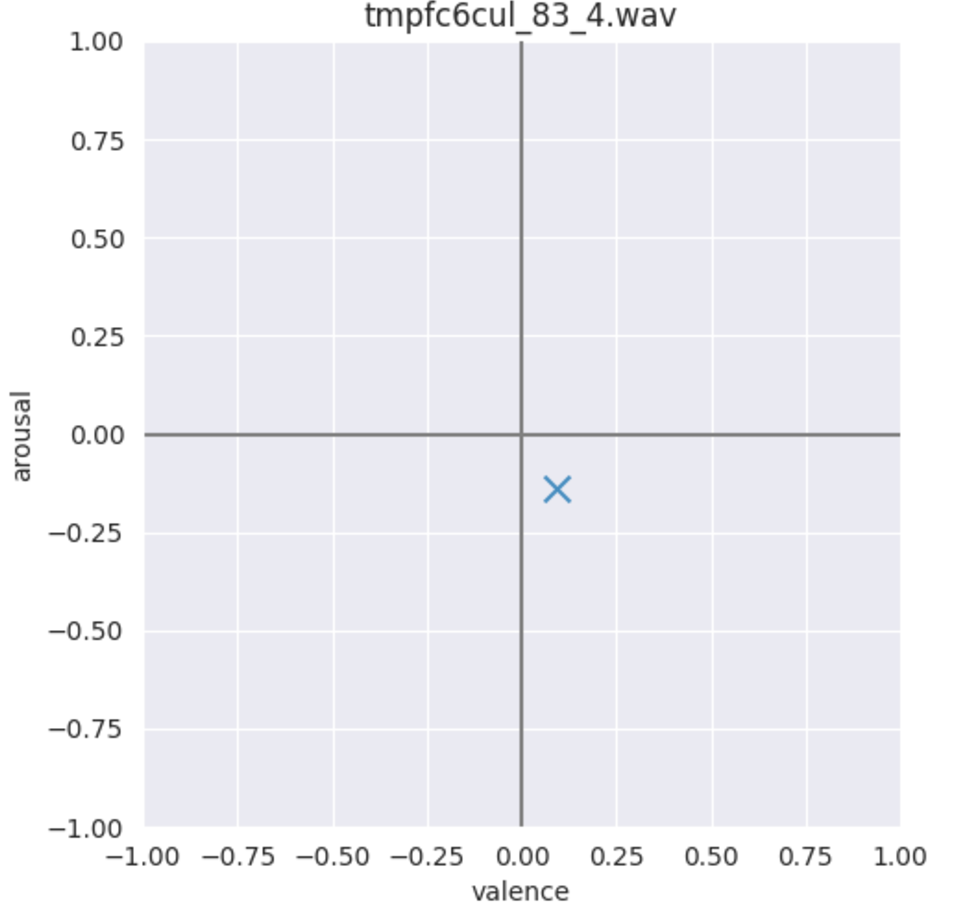


In [1]:
import os
import tensorflow as tf

os.environ['CUDA_VISIBLE_DEVICES'] = '2,3'

2025-01-04 22:47:14.215735: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('xydata_attribute.csv') # EMOPIAの音楽属性値のデータファイル
df_new = pd.read_csv('xydata_attribute.csv', index_col=0)

list_f = df['file'].values
print(np.array(list_f)) #.shape)
print(list_f[0][:-3])

['Q3_egYSmNuIFGk_1.mid' 'Q2_ItGNJM6skM4_1.mid' 'Q4_12tDlCQVRtA_2.mid' ...
 'Q1_UYh88SRZC24_0.mid' 'Q2__vZOEQCYSaY_1.mid' 'Q4_r_sD61KeUQU_0.mid']
Q3_egYSmNuIFGk_1.


In [ ]:
import essentia
import essentia.streaming
from essentia.standard import MonoLoader , TensorflowPredictMusiCNN, TensorflowPredict2D

# 曲から、推定座標を抽出
# 2秒ごと
xV = np.zeros((1071))
yA =np.zeros((1071))
for i in range(1071): #np.array(df['file'].values)):
    audio = MonoLoader(filename= '../../audio/' + list_f[i][:-3] + 'wav' , sampleRate=16000, resampleQuality=4)()
    embedding_model = TensorflowPredictMusiCNN(graphFilename="./evaluate_music/msd-musicnn-1.pb", output="model/dense/BiasAdd") # msd-musicnn-1.pb
    embeddings = embedding_model(audio)

    model = TensorflowPredict2D(graphFilename="./evaluate_music/muse-msd-musicnn-2.pb", output="model/Identity")
    predictions = model(embeddings)
    
    # 平均座標
    # 0:valence x
    # print(tf.reduce_mean(predictions[:,0]))
    xV[i] = ((tf.reduce_mean(predictions[:,0]) - 5.0)/4.0).numpy()
    print(xV[i])
    # 1:arousal y
    #print(tf.reduce_mean(predictions[:,1]))
    yA[i] = ((tf.reduce_mean(predictions[:,1]) - 5.0)/4.0).numpy()
    print(type(yA[i]))

In [10]:
xy_data = np.stack([xV, yA]).T
df_new['mtg_VA'] = xy_data.tolist()
print(df_new['mtg_VA'])

df_new.to_csv('xydata_attribute.csv')

Unnamed: 0
0          [0.04785418510437012, -0.158685564994812]
1        [0.03861820697784424, -0.16438400745391846]
2       [0.046170949935913086, -0.15706133842468262]
3        [0.06417322158813477, -0.17231357097625732]
4        [0.05874669551849365, -0.16468727588653564]
                            ...                     
1066      [0.04047679901123047, -0.1708991527557373]
1067     [0.04134535789489746, -0.17886888980865479]
1068     [0.06012928485870361, -0.18089187145233154]
1069    [0.044560790061950684, -0.15814638137817383]
1070     [0.03131580352783203, -0.16002881526947021]
Name: mtg_VA, Length: 1071, dtype: object
